In [171]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [172]:
raw_business_data = pd.read_csv('Legally_Operating_Businesses.csv',index_col = 'DCA License Number',low_memory=False)
raw_nyc_data = pd.read_csv('new_york.csv')

raw_business_data.columns

Index(['License Type', 'License Expiration Date', 'License Status',
       'License Creation Date', 'Industry', 'Business Name', 'Business Name 2',
       'Address Building', 'Address Street Name',
       'Secondary Address Street Name', 'Address City', 'Address State',
       'Address ZIP', 'Contact Phone Number', 'Address Borough',
       'Borough Code', 'Community Board', 'Council District', 'BIN', 'BBL',
       'NTA', 'Census Tract', 'Detail', 'Longitude', 'Latitude', 'Location'],
      dtype='object')

In [173]:
df_business = raw_business_data[raw_business_data['Address State'] == 'NY']
df_business = df_business[['License Expiration Date','License Status', 'License Creation Date','Industry','Address ZIP','Longitude', 'Latitude']]
df_business = df_business.dropna()


In [174]:
print(raw_nyc_data.columns)
df_nyc = raw_nyc_data[['Zip Code','Population','Business Annual Payroll','Female Population','Median Age','Households',\
                 'Income Per Household', 'Number of Businesses','White Population']]

df_nyc.loc[:,'female_percentage'] = df_nyc['Female Population']/df_nyc['Population']
df_nyc.loc[:,'colored_percentage'] = 1-df_nyc['White Population']/df_nyc['Population']
df_nyc = df_nyc.drop(['Female Population','White Population'],axis=1)

# merge two dataframes by the intersection of column ZIP
df_nyc.rename(columns = {'Zip Code':'Address ZIP'}, inplace = True) 
df_business.loc[:,'Address ZIP'] = df_business['Address ZIP'].astype(int)
df_com = pd.merge(df_business, df_nyc, how='inner',on='Address ZIP')

df_com=df_com.dropna()

Index(['Zip Code', 'City', 'State', 'Population', 'Population Estimate',
       'Business Annual Payroll', 'Business First Quarter Payroll',
       'Median Age', 'Male Population', 'Female Population',
       'Median Age Female', 'Median Age Male', 'Households',
       'Persons Per Household', 'Income Per Household', 'Number of Businesses',
       'Number of Employees', 'Delivery Business', 'Delivery Residential',
       'Delivery Total', 'Average House Value', 'CBSA Population',
       'CBSA Division Population', 'CBSA Name', 'CBSA Number', 'CBSA Type',
       'City Alias Name', 'State Full Name', 'State FIPS', 'County Name',
       'County FIPS', 'Latitude', 'Longitude', 'Region', 'Division',
       'Area Code', 'DayLight Savings', 'Land Area', 'Water Area',
       'Congressional District', 'Congressional Land Area', 'Asian Population',
       'Black or African American Population',
       'American Indian or Alaskan Native Population',
       'Native Hawaiian or other Pacific Island

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [175]:
# convert industry into categorical data
industry_types = df_com['Industry'].value_counts().to_frame().index
ind_dict = dict(zip(industry_types, range(len(industry_types))))
df_com = df_com.replace({'Industry': ind_dict})

In [176]:
# calculate life_span and right_censor
df_com.loc[:,'License Expiration Date'] = pd.to_datetime(df_com['License Expiration Date'])
df_com.loc[:,'License Creation Date'] = pd.to_datetime(df_com['License Creation Date'])
df_com['Y'] = (df_com['License Expiration Date']-df_com['License Creation Date']).dt.days
today = pd.to_datetime(pd.DataFrame({'year': [2019],'month': [11],'day': [22]}))
df_com['right_censor'] = np.where(df_com['License Expiration Date'].values > today.values,1,0)

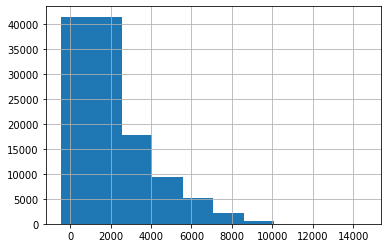

In [177]:
df_com['Y'].hist()

In [178]:
df_com

,License Expiration Date,License Status,License Creation Date,Industry,Address ZIP,Longitude,Latitude,Population,Business Annual Payroll,Median Age,Households,Income Per Household,Number of Businesses,female_percentage,colored_percentage,Y,right_censor
0,2020-03-31,Active,2016-03-25,4,10013,-73.997619,40.718663,27700,8251251,37.6,12096,106056,5229,0.496354,0.421552,1467,1
1,2020-03-31,Active,2009-05-27,4,10013,-73.996970,40.718101,27700,8251251,37.6,12096,106056,5229,0.496354,0.421552,3961,1
2,2020-12-31,Active,2003-08-19,1,10013,-73.997634,40.718636,27700,8251251,37.6,12096,106056,5229,0.496354,0.421552,6344,1
3,2021-12-31,Active,2002-10-17,1,10013,-73.999311,40.717549,27700,8251251,37.6,12096,106056,5229,0.496354,0.421552,7015,1
4,2021-12-31,Active,2018-02-14,1,10013,-74.007053,40.718268,27700,8251251,37.6,12096,106056,5229,0.496354,0.421552,1416,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118285,2013-06-30,Inactive,2011-06-29,0,12093,-77.519584,40.112385,1666,692,45.1,680,51316,18,0.485594,0.016807,732,0
118286,2015-02-28,Inactive,2013-08-01,0,10976,-77.519584,40.112385,2258,30669,43.3,622,59896,48,0.618689,0.130647,576,0
118287,2016-04-30,Inactive,2006-08-02,36,10924,-77.519584,40.112385,13120,219743,41.8,4454,95468,496,0.502363,0.145732,3559,0
118288,2011-06-30,Inactive,2002-12-24,0,14760,-77.519584,40.112385,18775,500504,41.0,8358,43065,619,0.517390,0.056192,3110,0


In [199]:
df_baseline = df_com.drop(['License Expiration Date','License Status','License Creation Date','Longitude','Latitude'],axis=1)

In [200]:
df_baseline = df_baseline.apply(lambda x: x if x.name in ['Industry','right_censor'] else preprocessing.scale(x))

In [206]:
from sklearn.model_selection import *
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score

#df_baseline = df_com[['Income Per Household','Y']]

#fit a baseline model
X = df_baseline.drop(['Y'],axis=1)
Y = df_baseline['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75,test_size=0.25)


In [207]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)
lr.score(X_train,Y_train)


0.012132330835572858

,Industry,Address ZIP,Population,Business Annual Payroll,Median Age,Households,Income Per Household,Number of Businesses,female_percentage,colored_percentage,Y,right_censor
0,4,-1.422027,-1.143358,1.450059,0.444986,-1.059228,1.362366,2.363393,-0.932732,-0.314436,-0.356259,1
1,4,-1.422027,-1.143358,1.450059,0.444986,-1.059228,1.362366,2.363393,-0.932732,-0.314436,1.022453,1
2,1,-1.422027,-1.143358,1.450059,0.444986,-1.059228,1.362366,2.363393,-0.932732,-0.314436,2.339803,1
3,1,-1.422027,-1.143358,1.450059,0.444986,-1.059228,1.362366,2.363393,-0.932732,-0.314436,2.710740,1
4,1,-1.422027,-1.143358,1.450059,0.444986,-1.059228,1.362366,2.363393,-0.932732,-0.314436,-0.384452,1
...,...,...,...,...,...,...,...,...,...,...,...,...
118285,0,2.208559,-2.146449,-0.458565,2.209580,-2.339296,-0.472561,-1.171761,-1.348393,-1.930340,-0.762575,0
118286,0,0.258864,-2.123639,-0.451630,1.786078,-2.345800,-0.184953,-1.151409,3.793311,-1.475846,-0.848814,0
118287,36,0.168100,-1.705126,-0.407891,1.433159,-1.916120,1.007448,-0.847485,-0.700592,-1.415621,0.800223,0
118288,0,6.863738,-1.487239,-0.342942,1.244935,-1.478367,-0.749141,-0.764041,-0.120058,-1.773099,0.552011,0
